<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [6]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [7]:
hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [8]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [9]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
# пишем функцию, которая позволит сформировать новый признак "Образование"
def get_education(text):
    text = text.split(' ')
    text = ' '.join(text[:2]).lower()
    
    if 'высшее образование' in text:
        return 'высшее'
    elif 'неоконченное высшее' in text:
        return 'неоконченное высшее'
    elif 'среднее специальное' in text:
        return 'среднее специальное'
    elif 'среднее образование' in text:
        return 'среднее'
    

# делаем преобразование и удаляем ненужный признак
hh_df['Образование'] =  hh_df['Образование и ВУЗ'].apply(get_education)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)
hh_df['Образование'].value_counts()


высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
# пишем функцию для приведения признака пола к 2 уникальным значениям "М" и "Ж"
def get_sex(text):
        
    if 'Мужчина' in text:
        return 'М'
    else:
        return 'Ж'

# пишем функцию для представления признака "Возраст" в виде целого числа
def get_age(text):
    text = text.replace(',', '')
    text_split = text.split(' ')
    word_list = ['лет', 'год', 'года']
    
    index = 0
    for i in text_split:
        if i in word_list:
            return int(text_split[index-1])
        else:
            index += 1
 
 # Создаём новые признаки и удаляем обработанный признак
            
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_sex)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)
hh_df = hh_df.drop('Пол, возраст', axis=1)

print(round(hh_df['Возраст'].mean(), 2))
round(hh_df['Пол'].value_counts(normalize=True)*100, 2)

32.2


М    80.93
Ж    19.07
Name: Пол, dtype: float64

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
# функция, которая пересчитывает опыт работы соискателя в месяцы
def get_experiense(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    
    year_word = ['год', 'года', 'лет']
    month_word = ['месяц', 'месяца', 'месяцев']
            
    arg_split = arg.split(' ')[:7]
    
    years = 0
    months = 0
    
    for index, values in enumerate(arg_split):
        if values in month_word:
            months = int(arg_split[index-1])
        if values in year_word:
            years = int(arg_split[index-1])
            
    return (years*12 + months)

# создаём новый признак ['Опыт работы (месяцев)'] и удаляем старый

hh_df['Опыт работы (месяцев)'] = hh_df['Опыт работы'].apply(get_experiense)
hh_df = hh_df.drop('Опыт работы', axis=1)

# Считаем чему равен медианный опыт работы
hh_df['Опыт работы (месяцев)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
# создаём функцию, которая разделяет города на 4 категории: Москва, Санк-Петербург, города-милионники и другие
def get_town(town):
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара',\
        'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    capital = ['Москва', 'Санкт-Петербург']
    
    town = town.split()[0]
    
    if town in capital:
        return town
    if town in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
 

#  создаём фукнцию, которая определяет готовность кандидатов к переезду

def get_moving(arg):
  arg_splitted = arg.split(' ')

  for index, item in enumerate(arg_splitted):
    if item == 'переезду' or item == 'переехать':
      if arg_splitted[index-3] == 'не' or arg_splitted[index-2] == 'не':
        return False
      else:
        return True    
 
# функция, которая определяет готовность кандидатов к командировкам

def get_trip(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else: 
            return True
    else:
        return False  
    
# создаём новые признаки 'Город', 'Готовность к переезду', 'Готовность к командировкам'

hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_town)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_moving)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_trip)
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

# Определяем процент соискателей, которые живут в Санкт_Петербурге
print('Процент соискателей, которые живут в Санкт-Петербурге',\
    int((hh_df[hh_df['Город'] == 'Санкт-Петербург'].shape[0])/(hh_df.shape[0])*100), '%')

# Определяем процент соискателей, готовых одновременно и к переездам, и к командировкам
mask1 = hh_df['Готовность к переезду'] == True
mask2 = hh_df['Готовность к командировкам'] == True
trip = int(round(((hh_df[mask1 & mask2]).shape[0]) / (hh_df.shape[0]) * 100))
print(f'Процент соискателей готовых одновременно и к переездам, и к командировкам {trip} %')

Процент соискателей, которые живут в Санкт-Петербурге 11 %
Процент соискателей готовых одновременно и к переездам, и к командировкам 32 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
# с помощью lambda-функции делаем преобразования one hot encoding признака 'Занятость'
hh_df['Полная занятость'] = hh_df['Занятость'].apply(lambda x: True if ('полная занятость' in x) else False)
hh_df['Частичная занятость'] = hh_df['Занятость'].apply(lambda x: True if ('частичная занятость' in x) else False)
hh_df['Стажировка'] = hh_df['Занятость'].apply(lambda x: True if ('стажировка' in x) else False)
hh_df['Проектная работа'] = hh_df['Занятость'].apply(lambda x: True if ('проектная работа' in x) else False)
hh_df['Волонтёрство'] = hh_df['Занятость'].apply(lambda x: True if ('волонтерство' in x) else False)

# с помощью lambda-функции делаем преобразования one hot encoding признака 'График'
hh_df['Полный день'] = hh_df['График'].apply(lambda x: True if ('полный день' in x) else False)
hh_df['Сменный график'] = hh_df['График'].apply(lambda x: True if ('сменный график' in x) else False)
hh_df['Гибкий график'] = hh_df['График'].apply(lambda x: True if ('гибкий график' in x) else False)
hh_df['Удалeнная работа'] = hh_df['График'].apply(lambda x: True if ('удалeнная работа' in x) else False)
hh_df['Вахтовый метод'] = hh_df['График'].apply(lambda x: True if ('вахтовый метод' in x)  else False)

# определяем, сколько человек ищут одновременно проектную работу и волотнёрство и сколько хотят работать вахтовым 
# методом с гибким графиком
project = hh_df[(hh_df['Проектная работа'] == True) & (hh_df['Волонтёрство'] == True)].shape[0]
flex = hh_df[(hh_df['Вахтовый метод'] == True) & (hh_df['Гибкий график'] == True)].shape[0]
print(f'Проектную работу и волонтёрство ищут {project} человек')
print(f'Хотят работать вахтовым методов с гибким графиком {flex} человек')

hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

Проектную работу и волонтёрство ищут 436 человек
Хотят работать вахтовым методов с гибким графиком 2311 человек


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
# загружаем таблицу с курсами валют и удаляем ненужные признаки
df_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')
df_rates = df_rates.drop(['per', 'time', 'vol'], axis=1)

# преобразуем даты 
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True)
hh_df['Обновление резюме'] = hh_df['Обновление резюме'].dt.date
df_rates['date'] = pd.to_datetime(df_rates['date'], dayfirst=True)
df_rates['date'] = df_rates['date'].dt.date

# Приводим все названия валют к стандарту ISO
def get_money(arg):
    
    arg = float(arg.split(' ')[0])
    return arg

def get_currency(arg):
    arg = arg.split(' ')[1].replace('.', '')
    
    currency = {
        'грн': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'белруб': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT'
    }
    
    if arg == 'руб':
        return 'RUB'
    else:
        return currency[arg]

# определяем желаемую ЗП и валюту соискателей        
hh_df['Сумма ЗП'] = hh_df['ЗП'].apply(get_money)
hh_df['Валюта'] = hh_df['ЗП'].apply(get_currency)

# объединяем полученные DataFrame
merged = hh_df.merge(
    df_rates,
    how='left',
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date']
    )

# заполняем признаки close и proportion 1 для рубля
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# создаём новый признак 'ЗП (руб)' и удаляем ненужные признаки
hh_df['ЗП (руб)'] = merged['close'] * merged['Сумма ЗП'] / merged['proportion']
hh_df = hh_df.drop(['ЗП', 'Сумма ЗП', 'Валюта'], axis=1)

# определяем желанную медианную ЗП соискателей
median_ZP = round(hh_df['ЗП (руб)'].median() / 1000)
print(f'Желанная медианная заработная плата соискателей равна {median_ZP} тысяч рублей')

Желанная медианная заработная плата соискателей равна 59 тысяч рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [16]:
# Строим гистограму Распределения призака "Возраст"
fig_hist = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    title='Распределение признака "Возраст"'
)

# Строим  коробчатую диаграмму призка "Возраст "
fig_box = px.box(
    data_frame=hh_df,
    x='Возраст',
    title='Распределение признака "Возраст"'
)

fig_hist.write_html("Plotly/fig_hist.html")
fig_box.write_html("Plotly/fig_box.html")

#fig_hist.show()
#fig_box.show()

**Выводы**

Распределение признака "Возраст" логнормальное. Модальное значение возраста соискателей равно 30. Предельные значения признака - 14 лет и 100 лет. Возраст большинства соискателей лежит в интервале от 27 лет до 36 лет. Для признака "Возраст" есть ряд аномалий, например, возраст 100 лет или 14 лет. Дополнительно к аномальным значениям можно отнести значения больше 70 лет. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [17]:
# Строим гистограмму распределения признака "Опыт работы (месяцев)"
fig_hist = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяцев)',
    title='Распределение признака "Опыт работы (месяцев)"'
)

# Строим коробчатую диаграмму распределения признака "Опыт работы (месяцев)"

fig_box = px.box(
    data_frame=hh_df,
    x='Опыт работы (месяцев)',
    title='Распределение признака "Опыт работы (месяцев)"'
)

fig_hist.write_html("Plotly/fig_hist1.html")
fig_box.write_html("Plotly/fig_box1.html")

#fig_hist.show()
#fig_box.show()

**Выводы**


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [18]:
# Строим гистограмму распределения признака "ЗП (руб)"
fig_hist = px.histogram(
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение признака "ЗП (руб)"'
)

# Строим коробчатую диаграмму распределения признака "ЗП (руб)"

fig_box = px.box(
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение признака "ЗП (руб)"'
)

fig_hist.write_html("Plotly/fig_hist2.html")
fig_box.write_html("Plotly/fig_box2.html")

#fig_hist.show()
#fig_box.show()

**Выводы**

Мода распрделения равна 47,5 - 52,49 тыс. руб. Предельные значения признака  "ЗП (руб)" находятся в интервале от 1 до 24,3 млн.  При этом, заработная плата большинства соискателей находится в интервале от 22,5 до 82,49 тыс. руб. Аномалиями для признака "ЗП (руб)" можно считать 7,6 млн., 24,3 млн., а также значение в 1 руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [19]:
# Исключаем выбросы более со значением более 1 млн. и группируем данные
median_salary = hh_df[hh_df['ЗП (руб)'] < 1e6].groupby('Образование', as_index=False).median()

# Строим диаграмму зависимости медионной жежаемой заработной платы от уровня образования

fig_bar = px.bar(
    data_frame=median_salary,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    text='ЗП (руб)',
    orientation='v',
    title='Зависимость медионной желаемой заработной платы от уровня образования',
    width=750,
    height=500
)

#fig_bar.show()
fig_bar.write_html("Plotly/fig_bar.html")

**Выводы**
Наибольший желаемый уровень заработной платы наблюдается для высшего образования, наименьший - для среднего и среднего специального. 
Признак образования важен при прогнозировании заработной платы

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [20]:
# Исключаем выбросы со значениями более 1 млн. 

salary = hh_df[hh_df['ЗП (руб)'] < 1e6]

# Строим диаграмму, которая показывает разпределение заработной платы в зависимости от города

fig_bar = px.box(
    data_frame=salary,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    orientation='v',
    title='Распределение желаемой заработной платы в зависимости от города',
    width=900,
    height=500
)

fig_bar.write_html("Plotly/fig_bar2.html")

#fig_bar.show()


**Выводы**

Соотношение медианного уровня заработной платы и их размах в зависимости от города: другие 40 тыс. к 30 тыс., Москва - 85 тыс. к 90 тыс., города-милионники - 40 тыс. к 30 тыс., Санк-Петербург - 60 тыс. к 40 тыс. 
Признак города важен при прогнозировании заработной платы. Например, Москва и Санкт-Петербург имею наибольшие показатели по сравнению с остальными городами

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [21]:
# Группируем данные по признакам "Готовность к командировкам" и "Готовность к переезду"

median_salary = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

# Строим диаграмму зависимости медиоанной заработной платы от признаков "Готовность к переезду" и
# и "Готовность к командировкам"

fig_bar = px.bar(
    data_frame=median_salary,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Зависимость медианной желаемой заработной платы от готовности к командировкам и переезду'
)
#fig_bar.show()

fig_bar.write_html("Plotly/fig_bar3.html")

**Выводы**

На оси Y отражена готовность соискателей к переезду (false - не готов к переезду, true - готов к переезду), Готовность к командировкам отображена разными цветами: синий - не готов к командировкам, красный - готов.

Из представленной диаграммы видно, что люди, которые готовы к переезду желают более высокую заработную плату, чем люди, которые не готовы к переезду. При этом люди согласные на командировки желают более высокую заработную плату. 

Соискатели, которые не готовы к переезду и к командировкам, хотят на 20 тыс. меньше, чем люди готовые к командировкам, но не готовые к переезду, и на 10 тыс. меньше, чем люди готовые к переезду и не готовые к командировкам, и на 25 тыс. меньше, чем те, которые готовы и к переезду и к командировкам. 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [22]:
# Строим сводную таблицу

hh_pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

# Строим тепловую карту
fig = px.imshow(
    hh_pivot,
    aspect='auto',
    color_continuous_scale='YlGnBu'
)

fig.write_html("Plotly/fig.html")

#fig.show()

**Выводы**

основной вывод можно сделать следующий: чем выше уровень образования, тем выше уровень желаемой заработной платы, при этом, с ростом возраста данная тенденция сохраняется. 

Среднее специальное и среднее образование практически не влияют на размер желаемой зарабной платы с росто возраста. 

Дополнительно, на диаграмме виден выброс - достаточно высокий уровень желаемой заработной платы для среднего специального образования и возраста 100 лет 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

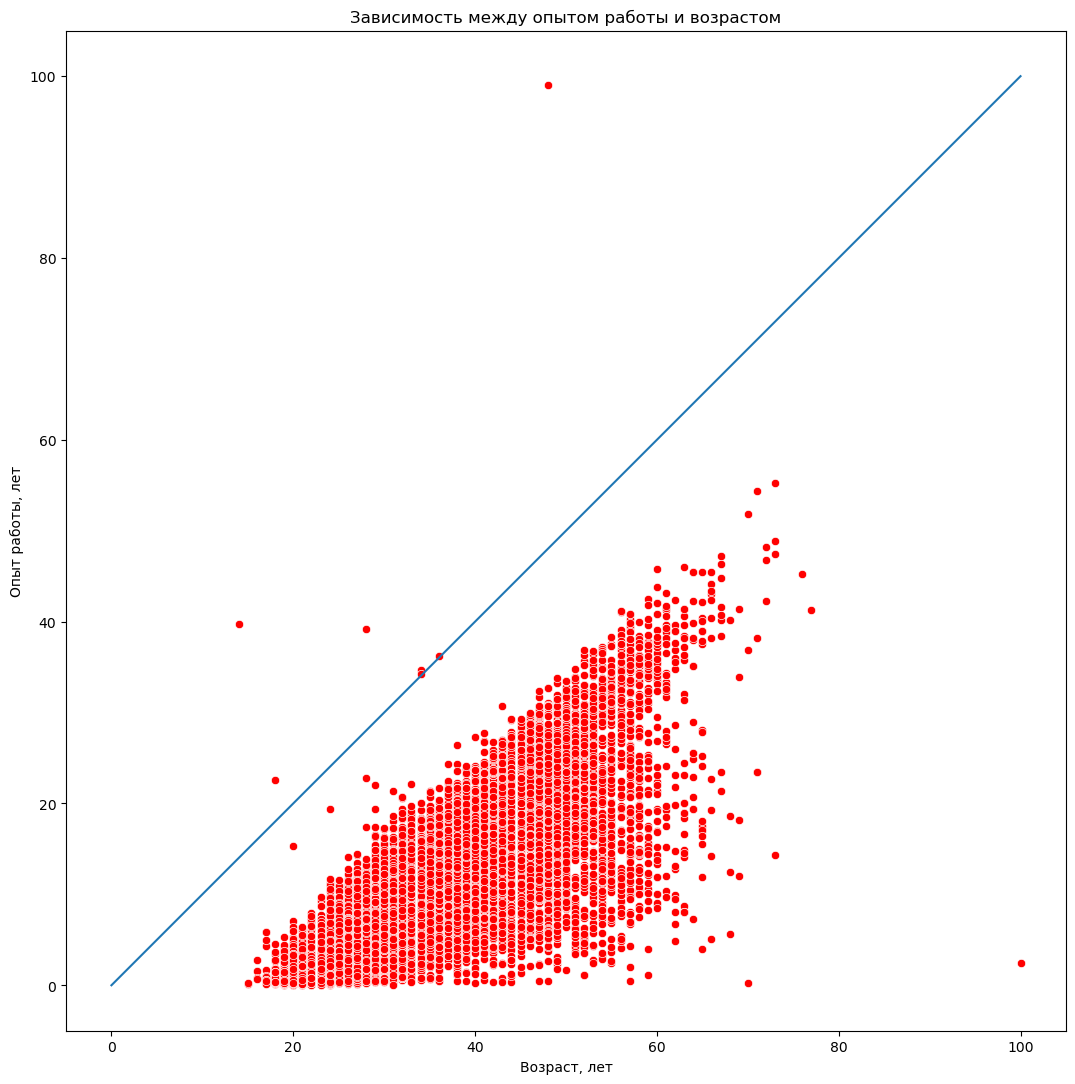

In [23]:
# Переводим опыт работы из месяцев в года

hh_df_scatter = hh_df.copy()
hh_df_scatter['Опыт работы (год)'] = hh_df_scatter['Опыт работы (месяцев)'] / 12


# Строим холст и систему коорединат

fig = plt.figure(figsize=(10, 10))
axes = fig.add_axes([0, 0, 1, 1])

fig_scatter = sns.scatterplot(
    data=hh_df_scatter,
    x='Возраст',
    y='Опыт работы (год)',
    marker='o',
    color='red'
)

# Чертим дополнительную прямую, чтобы визуально исключить аномалии

sns.lineplot(x=[0, 100], y=[0, 100])

# Подписываем оси и заголовок диаграммы
axes.set_title('Зависимость между опытом работы и возрастом')
axes.set_xlabel('Возраст, лет')
axes.set_ylabel('Опыт работы, лет');

**Выводы**

На диаграмме видно, что в возрастом растёт и опыт работы соискателей. 

Дополнительно на графике отражены 7 аномальных точек. Точки, где опыт работы превосходит возраст. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [24]:
# Проанализируем связь пола и желаемой заработной платы


#  Исключаем выбросы со значениями более 1 млн. и группируем данные
hh_df_gender = hh_df.copy()
hh_df_gender['Пол'] = hh_df_gender['Пол'].apply(lambda x: 'Мужчины' if x == 'М' else 'Женщины')

hh_df_gender_grouped = hh_df_gender[hh_df_gender['ЗП (руб)'] < 1e6].groupby('Пол', as_index=False).median()

# Строим столбчатую диаграмму
fig = px.bar(
    data_frame=hh_df_gender_grouped,
    x='Пол',
    y='ЗП (руб)',
    color='Пол',
    title='Зависимость желаемой зарабоной платы от пола',
    width=900,
    height=500
)

#fig.show()

fig.write_html("Plotly/fig1.html")

**Выводы**

Из графика видно, что уровень желаемой заработной платы у женщин меньше, чем у мужчин на 12 тыс. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [25]:
# Создаем список столбцов по которым будем искать дубликаты

duplicates_columns = hh_df.columns

# Создаем маску дубликатов и проводим фильтрацию 

mask = hh_df.duplicated(subset=duplicates_columns)
hh_duplicates = hh_df[mask]
hh_df = hh_df.drop_duplicates()

print(f'Число полных дубликатов {hh_duplicates.shape[0]}')

Число полных дубликатов 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [26]:
# Выводим информацию о числе пропусков

hh_df_null = hh_df.isnull().sum()
display(hh_df_null[hh_df_null > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяцев)              168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [27]:
# удаляем строки, где есть пропуск в столбцах с места работы и должностью
hh_df = hh_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], axis=0)

# Заполним пропуски в столбце "Опыт работы (месяцев)" мединными значениями
values = {
    'Опыт работы (месяцев)': hh_df['Опыт работы (месяцев)'].median()
}

hh_df['Опыт работы (месяцев)'] = hh_df['Опыт работы (месяцев)'].fillna(values)

print('Результирующее среднее значение в столбце "Опыт работы (месяцев)" равно', round(hh_df['Опыт работы (месяцев)'].mean()))

Результирующее среднее значение в столбце "Опыт работы (месяцев)" равно 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [28]:
# Находим и удаляем выбросы  по заработной плате выше 1 млн. руб. и ниже 1 тыс руб. 
outliers = hh_df[(hh_df['ЗП (руб)'] > 1e6) | (hh_df['ЗП (руб)'] < 1e3)]
print(f'Количество найденных выбросов равно {outliers.shape[0]}')

hh_df = hh_df.drop(outliers.index, axis=0)

Количество найденных выбросов равно 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [29]:
# Находим выбросы, где опыт работы в годах превышает возраст соискателя
outliers = hh_df[(hh_df['Опыт работы (месяцев)'] / 12 ) >= hh_df['Возраст']]
print(f'Количество выбросов: {outliers.shape[0]}')

hh_df = hh_df.drop(outliers.index, axis=0)

Количество выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

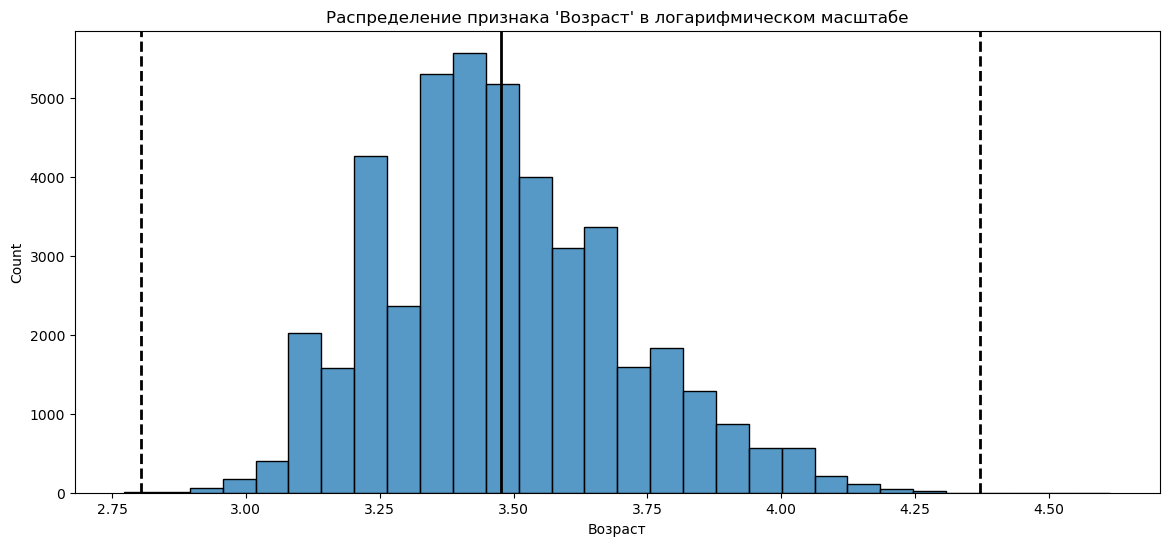

In [30]:
# строим график в логарифмическом масштабе и добавляем линии, отображающие средее и границы интервала метода трех сигм

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
log_age = np.log(hh_df['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title("Распределение признака 'Возраст' в логарифмическом масштабе");
histplot.set_xlabel('Возраст');

In [31]:
# создаем функцию для определения выбросов
    
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_df, 'Возраст', log_scale=True, left=3, right=4.0)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Выведем таблицу с отклонениями
display(outliers)

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяцев),Город,...,Частичная занятость,Стажировка,Проектная работа,Волонтёрство,Полный день,Сменный график,Гибкий график,Удалeнная работа,Вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,False,True,False,False,60000.0



Согласно графику мы видим, что распрделение скошено вправо, так как наблюдается хвост в правой части графика.

Также мы вывели таблицу с выбросами, которые были определены по методу z-отклонений. В эту категорию попали соискатели с возрастом 15 и 100 лет.